<a href="https://colab.research.google.com/github/nathan-tw/Data-Science-for-Cybersecurity/blob/master/HW08_106306027.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using CNN to classifiy malicious PE files into malware family

Please take a careful look at the following tutorial.

https://www.tensorflow.org/tutorials/keras/classification

It is an example of using tensorflow/keras to build a simple neural network to classify images of clothing. The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9.

Please write your homework by modifying this tutorial. We will provide you the first 748 bytes of several PE files and their corresponding class labels (just like the example in the tutorial). Would you please desgin a more complicated neural network (e.g., using convolution, pooling, dense, dropout, dense, softmax, ...) to increase the classification accuracy.

In [92]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense


# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


### Get pefiles

In [93]:
!wget https://drive.google.com/uc?id=1zugIaSnMfx3JccLPm5lLTYCFBf0IK32z -O pefiles.pickle

--2020-05-31 15:03:26--  https://drive.google.com/uc?id=1zugIaSnMfx3JccLPm5lLTYCFBf0IK32z
Resolving drive.google.com (drive.google.com)... 74.125.134.139, 74.125.134.102, 74.125.134.113, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.139|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ggv79pjf6lt8frb0hp46m2vt1lk07lkl/1590937350000/17174434063503717705/*/1zugIaSnMfx3JccLPm5lLTYCFBf0IK32z [following]
--2020-05-31 15:03:27--  https://doc-0k-38-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/ggv79pjf6lt8frb0hp46m2vt1lk07lkl/1590937350000/17174434063503717705/*/1zugIaSnMfx3JccLPm5lLTYCFBf0IK32z
Resolving doc-0k-38-docs.googleusercontent.com (doc-0k-38-docs.googleusercontent.com)... 172.253.123.132, 2607:f8b0:400c:c16::84
Connecting to doc-0k-38-docs.googleusercontent.com (doc-0k-38-docs.googleusercontent.com)|172.2

In [94]:
!ls -al

total 288
drwxr-xr-x 1 root root   4096 May 31 13:27 .
drwxr-xr-x 1 root root   4096 May 31 13:20 ..
drwxr-xr-x 1 root root   4096 May 27 16:27 .config
-rw-r--r-- 1 root root 275871 May 31 15:03 pefiles.pickle
drwxr-xr-x 1 root root   4096 May 27 16:27 sample_data


### load training data

In [0]:
import pickle

def my_load_data(p):
  with open(p, 'rb') as fd:
    tu = pickle.load(fd)
  return (tu[0], tu[1])

In [0]:
(train_images, train_labels) = my_load_data("/content/pefiles.pickle")

In [0]:
# now go https://www.tensorflow.org/tutorials/keras/classification
# and try to understand the tutorial
# and write your code below.
# My codes is very similar to the tutorial.

In [98]:
# our data includes 9 different malware families
class_names = ['Loring', 'Urausy.C', 'Elkern.B', 'Fareit', 'Hotbar',
               'Gepys.A', 'Bulta!rfn', 'Tugspay.A', 'Zbot']

len_classes = len(class_names)

print(len_classes)

9


### Explore the data

In [99]:
# We have 348 malware pefiles, and each of them is a 28x28 byte array.
train_images.shape

(348, 28, 28)

In [100]:
# The lenght of the label is 348 as well.
len(train_labels)

348

In [101]:
# Each label is an integer.
# The 1st malware's label is 1.
# It stands for that the 1st malware belongs to 'Loring' family.
# See class_names.
train_labels

array([4, 3, 4, 3, 1, 8, 8, 1, 3, 5, 1, 4, 8, 0, 3, 3, 8, 5, 4, 8, 1, 6,
       4, 8, 4, 1, 2, 0, 8, 3, 1, 1, 2, 4, 1, 4, 4, 1, 8, 5, 6, 1, 4, 3,
       3, 4, 3, 5, 3, 3, 3, 5, 5, 4, 4, 3, 5, 4, 4, 0, 8, 3, 3, 4, 2, 4,
       3, 6, 3, 5, 8, 1, 5, 8, 3, 3, 1, 5, 2, 4, 6, 0, 8, 5, 3, 3, 3, 2,
       5, 3, 4, 6, 6, 1, 5, 8, 3, 4, 4, 3, 3, 8, 1, 3, 3, 3, 3, 5, 4, 2,
       6, 3, 4, 3, 4, 8, 1, 3, 1, 1, 0, 0, 4, 4, 5, 5, 8, 3, 2, 3, 3, 3,
       4, 0, 5, 0, 1, 8, 4, 2, 1, 3, 5, 1, 1, 4, 2, 8, 4, 4, 3, 1, 4, 8,
       4, 4, 3, 4, 0, 5, 4, 3, 3, 8, 6, 4, 4, 0, 8, 3, 4, 5, 3, 4, 5, 1,
       2, 3, 1, 3, 3, 3, 4, 5, 3, 8, 5, 3, 6, 4, 4, 3, 4, 2, 4, 3, 8, 1,
       4, 5, 4, 3, 6, 1, 3, 3, 4, 8, 4, 8, 5, 5, 6, 0, 4, 3, 4, 5, 4, 3,
       3, 3, 4, 3, 4, 5, 3, 4, 8, 3, 5, 1, 5, 1, 3, 1, 2, 4, 0, 3, 1, 1,
       0, 3, 8, 3, 3, 5, 5, 0, 5, 4, 3, 8, 4, 6, 3, 0, 5, 5, 1, 6, 1, 3,
       5, 6, 8, 1, 1, 5, 4, 6, 4, 5, 5, 3, 1, 1, 4, 6, 5, 4, 4, 4, 1, 3,
       6, 4, 8, 8, 4, 8, 3, 1, 1, 2, 1, 6, 3, 4, 3,

In [102]:
# An example of first PE files.
# It is a 28x28 integer matrix.
train_images[0]

array([[ 77,  90, 144,   0,   3,   0,   0,   0,   4,   0,   0,   0, 255,
        255,   0,   0, 184,   0,   0,   0,   0,   0,   0,   0,  64,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 248,   0,   0,   0,  14,  31, 186,  14,   0,
        180,   9, 205,  33, 184,   1,  76, 205,  33,  84, 104, 105, 115,
         32, 112],
       [114, 111, 103, 114,  97, 109,  32,  99,  97, 110, 110, 111, 116,
         32,  98, 101,  32, 114, 117, 110,  32, 105, 110,  32,  68,  79,
         83,  32],
       [109, 111, 100, 101,  46,  13,  13,  10,  36,   0,   0,   0,   0,
          0,   0,   0, 165,  63,  53,  94, 225,  94,  91,  13, 225,  94,
         91,  13],
       [225,  94,  91,  13, 142,  40, 240,  13, 228,  94,  91,  13, 250,
        195, 197,  13, 251,  94,  91,  13, 250, 195, 241,  13,  68,  94,
         91,  13],
       [25

### Preprocess the data

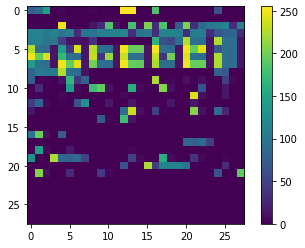

In [103]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()


# Note that we view the first 28x28 bytes of a PE file as an image.
# A byte with value '0x00' has darkest color,
# whilw a byte with value '0xFF' has brightest color.
# Below is the visualization of the first PE file.

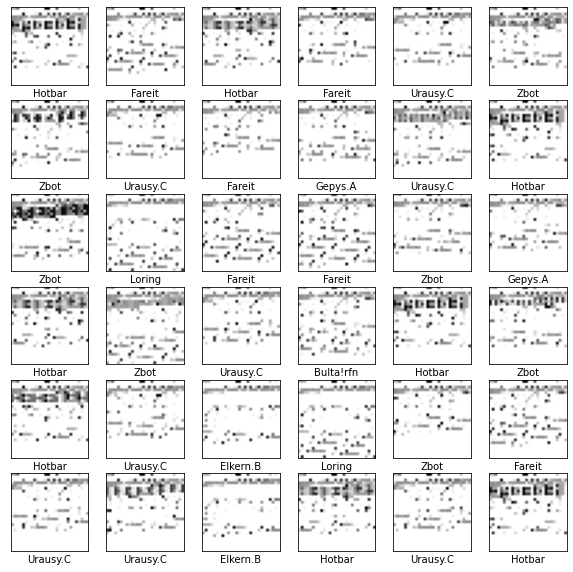

In [104]:
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

The above images are samples of different PE files. Could you visually distinguish them? Their labels are shown under each of the image.

Q1: Before building the model, if there is anything you can do to the data, do it right here.


In [0]:
# Any preprocessing?

# 簡單reshape
train_images = train_images.reshape(348,28,28,1)

### Build the model

In [0]:
# This is the model from tensorflow's example.
# Please try to modify it.

model = keras.Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

# 分成9類
model.add(Dense(len_classes, activation='softmax'))


In [0]:
# This is the model from tensorflow's example.
# Please try to modify it.

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

Q2: Why the example use 'SparseCategoricalCrossentropy' and what is 'from_logits'?

<font color='blue'>A2:因為label是沒有經過one-hot的，所以不能使用CategoricalCrossentropy。

<font color='blue'>在預設中，from_logits為False，而他代表的意思是，因為logit函數是將0到1之間的數值轉換-inf到+inf，而softmax或sigmoid則是將-inf到+inf之間的數值轉換到0~1，也就是說from_logits可以視為將數值從歸一化還原的方法。

### Train the model

In [108]:
# This is the model from tensorflow's example.
# Please try to modify it.
model.fit(train_images, train_labels, epochs=10, validation_split=0.3)

Epoch 1/10
8/8 [==============================] - 1s 99ms/step - loss: 36.6197 - accuracy: 0.3210 - val_loss: 4.0024 - val_accuracy: 0.6190
Epoch 2/10
8/8 [==============================] - 1s 90ms/step - loss: 3.0954 - accuracy: 0.5638 - val_loss: 1.0535 - val_accuracy: 0.7238
Epoch 3/10
8/8 [==============================] - 1s 89ms/step - loss: 0.8555 - accuracy: 0.7366 - val_loss: 0.9357 - val_accuracy: 0.7524
Epoch 4/10
8/8 [==============================] - 1s 89ms/step - loss: 0.6996 - accuracy: 0.8066 - val_loss: 0.7990 - val_accuracy: 0.7238
Epoch 5/10
8/8 [==============================] - 1s 88ms/step - loss: 0.5634 - accuracy: 0.8189 - val_loss: 0.6663 - val_accuracy: 0.8000
Epoch 6/10
8/8 [==============================] - 1s 91ms/step - loss: 0.4776 - accuracy: 0.8519 - val_loss: 0.5850 - val_accuracy: 0.8286
Epoch 7/10
8/8 [==============================] - 1s 90ms/step - loss: 0.3446 - accuracy: 0.8683 - val_loss: 0.6072 - val_accuracy: 0.8190
Epoch 8/10
8/8 [==========

Q3: What is 'epochs'? How does it affect the result?

<font color='blue'>A3:epochs 是指資料集總共被訓練幾次，至於他怎麼影響結果，我的看法是如果們相信蒐集到的資料與母體極為相近，epochs數可以更大，亦即沒有那麼容易overfit;相反的，如果epochs太大雖然在training data上會有更好的表現，但更容易overfit。

Q4: What is 'split_validation' in model.fit()? Check it out in tensorflow's web page. Use it in your code.

<font color='blue'>A4:在model.fit()的參數中，並無split_validation的選項，相近的是validation_split，該參數指的是validation set 切分的比例，例如0.3即是訓練資料三成切分出來不訓練，作為驗證用。

Q5: Could you exaplin the output of model.fit()? And what is your accuracy?

<font color='blue'>A5:每一個進度條代表一Epoch訓練，也就是訓練集整個被訓練一次。在訓練集AC為0.93，而驗證集則為0.83。loss則代表在該次訓練中cross entropy計算出來的值。

Q6: How do you know your model is not overfitted?

<font color='blue'>A6:一般我們沒有什麼手段知道自己的模型有沒有overfit，比較容易觀察的方法是validation set的AC，0.83的正確率應該是沒有過度擬合才對。

Q7: Could you introduce 'early stop mechanism' in your code? Then, train the model again. Does it works?

<font color='blue'>A7:early stop mechanism是在fit時，檢查每個epoch的loss有沒有遞減，若沒減少則停止訓練，用EarlyStop是因為繼續訓練會導致測試集上的準確率下降，而在測試集上的準確降低，有可能是overfit或是learning rate太大導致無法收斂。

In [111]:
model2 = keras.Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'))
model2.add(Conv2D(64, (3, 3), activation='relu'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.25))
model2.add(Flatten())
model2.add(Dense(128, activation='relu'))
model2.add(Dropout(0.5))

# 分成9類
model2.add(Dense(len_classes, activation='softmax'))
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)
model2.fit(train_images, train_labels, epochs=10, validation_split=0.3, callbacks=[callback])

Epoch 1/10
8/8 [==============================] - 1s 101ms/step - loss: 33.8671 - accuracy: 0.3045 - val_loss: 4.8344 - val_accuracy: 0.4476
Epoch 2/10
8/8 [==============================] - 1s 88ms/step - loss: 2.3501 - accuracy: 0.6420 - val_loss: 1.0672 - val_accuracy: 0.6571
Epoch 3/10
8/8 [==============================] - 1s 87ms/step - loss: 1.0165 - accuracy: 0.6831 - val_loss: 1.0485 - val_accuracy: 0.7143
Epoch 4/10
8/8 [==============================] - 1s 89ms/step - loss: 0.8483 - accuracy: 0.7202 - val_loss: 0.8604 - val_accuracy: 0.7619
Epoch 5/10
8/8 [==============================] - 1s 89ms/step - loss: 0.6507 - accuracy: 0.7695 - val_loss: 0.7335 - val_accuracy: 0.8095
Epoch 6/10
8/8 [==============================] - 1s 89ms/step - loss: 0.5697 - accuracy: 0.8025 - val_loss: 0.7393 - val_accuracy: 0.8095
Epoch 7/10
8/8 [==============================] - 1s 88ms/step - loss: 0.4554 - accuracy: 0.8807 - val_loss: 0.6674 - val_accuracy: 0.8190
Epoch 8/10
8/8 [=========

<font color='blue'>看起來沒什麼用，可能因為原本的模型訓練次數也不算多，也可能沒有overfit。

Q8: Any idea of improving the classification accuracy?

<font color='blue'>A8:除了調整神經網絡的架構外，沒想到更好的方法，有想過做更多影像前處理，但我認為翻轉圖片或裁切等並不適合作為api calls的處理。